In [ ]:
import matplotlib.pyplot as plt
import os,PIL,pathlib
import numpy as np
import pandas as pd
import warnings
from tensorflow import keras
import tensorflow as tf
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pathlib
resnet_checkpoint = "/content/drive/MyDrive/Colab Notebooks/603_project/best_model_resnet50.h5"
#resnet_checkpoint = pathlib.Path(resnet_checkpoint)

In [ ]:
batch_size = 32
img_height = 322  
img_width  = 480
class_names = ['Apple', 'Banana', 'Carambola', 'Guava', 'Kiwi', 'Mango', 'Orange', 'Peach', 'Pear', 'Persimmon', 'Pitaya', 'Plum', 'Pomegranate', 'Tomatoes', 'muskmelon']

In [ ]:


from tensorflow.keras import layers, models, Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,BatchNormalization,Activation

base_model = keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(img_height,img_width,3))

for layer in base_model.layers:
    layer.trainable = True
    
X = base_model.output
X = Flatten()(X)

X = Dense(512, kernel_initializer='he_uniform')(X)
X = BatchNormalization()(X)
X = Activation('relu')(X)

X = Dense(16, kernel_initializer='he_uniform')(X)
X = BatchNormalization()(X)
X = Activation('relu')(X)

output = Dense(len(class_names), activation='softmax')(X)

model = Model(inputs=base_model.input, outputs=output)

In [ ]:
new_model = model.load_weights(resnet_checkpoint)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 322, 480, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 328, 486, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 161, 240, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
data_dir = "/content/drive/MyDrive/Colab Notebooks/603_project/test_file"
import pathlib
data_dir = pathlib.Path(data_dir)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.8,
    subset="validation",
    seed=12,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 5282 files belonging to 10 classes.
Using 4225 files for validation.


In [ ]:
test_pre   = []
test_label = []

for images, labels in test_ds:
    for image, label in zip(images, labels):
        img_array = tf.expand_dims(image, 0) 
        prediction = model.predict(img_array)
        test_pre.append(class_names[np.argmax(prediction)])
        test_label.append(class_names[label])

1/1 [==============================] - 1s 652ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

def plot_cm(labels, predictions):
    
    conf_numpy = confusion_matrix(labels, predictions)
    conf_df = pd.DataFrame(conf_numpy, index=['Apple', 'Banana', 'Kiwi', 'Mango', 'Orange', 'Peach', 'Pear', 'Plum', 'Pomegranate', 'Tomatoes'] ,columns=['Apple', 'Banana', 'Kiwi', 'Mango', 'Orange', 'Peach', 'Pear', 'Plum', 'Pomegranate', 'Tomatoes'])  
    
    plt.figure(figsize=(8,7))
    
    sns.heatmap(conf_df, annot=True, fmt="d", cmap="BuPu")
    
    plt.title('confusion matrix',fontsize=15)
    plt.ylabel('real value',fontsize=14)
    plt.xlabel('predict value',fontsize=14)

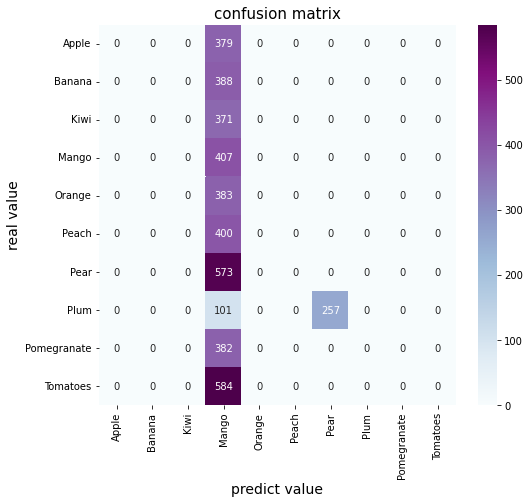

In [ ]:
plot_cm(test_label, test_pre)